##Context
Sistem bike-sharing memungkinkan pengguna untuk menyewa sepeda secara fleksibel di berbagai lokasi dengan tujuan meningkatkan mobilitas perkotaan. Data dalam dataset ini mencakup faktor-faktor yang mempengaruhi permintaan sepeda pada waktu tertentu, seperti waktu, cuaca, suhu, hari dalam seminggu, dan faktor lain yang bisa memengaruhi tingkat penggunaan sepeda.

Dalam konteks ini, kita ingin menganalisis faktor-faktor apa saja yang memengaruhi jumlah penggunaan sepeda setiap harinya dan bagaimana memprediksi jumlah sepeda yang digunakan berdasarkan fitur-fitur tersebut.

##Target
Target dalam analisis ini adalah jumlah penggunaan sepeda pada suatu waktu tertentu. Bisa berupa jumlah sepeda yang dipinjam dalam satu hari atau jumlah peminjaman per jam tergantung dari fokus analisis yang diinginkan. Model dapat dipakai untuk memprediksi jumlah sepeda yang akan digunakan, apakah tinggi, sedang, atau rendah pada waktu tertentu berdasarkan data historis.

Variabel target yang bisa diprediksi:

- Jumlah sepeda yang digunakan (numerik): Jumlah sepeda yang disewa pada waktu tertentu.
- Kategori permintaan: Rendah, sedang, tinggi (klasifikasi) jika data bersifat kategorikal.

##Problem Statement
Bagaimana cara memprediksi jumlah penggunaan sepeda di sistem bike-sharing berdasarkan faktor-faktor seperti waktu, cuaca, suhu, dan faktor eksternal lainnya, untuk membantu mengelola distribusi sepeda dan mengoptimalkan operasional?

Masalah spesifik:

- Bagaimana memprediksi permintaan sepeda pada hari-hari tertentu (misalnya pada hari libur atau saat cuaca ekstrem)?
- Bagaimana memahami pola penggunaan sepeda di waktu-waktu tertentu (pagi, siang, sore)?
- Bagaimana menggunakan data ini untuk merencanakan alokasi sepeda secara lebih efisien di berbagai lokasi?

##Goals
- Prediksi Permintaan Sepeda: Memiliki model yang dapat memprediksi berapa banyak sepeda yang kemungkinan akan digunakan di waktu tertentu.
- Optimalisasi Sumber Daya: Mengoptimalkan distribusi sepeda agar jumlah sepeda yang tersedia seimbang dengan permintaan di berbagai stasiun, menghindari kelebihan atau kekurangan sepeda.
- Perencanaan Operasional: Menyediakan rekomendasi tentang kapan dan di mana sepeda lebih banyak dibutuhkan berdasarkan data prediksi permintaan.
- Pengelolaan Infrastruktur: Memberikan insight yang dapat digunakan untuk merencanakan penempatan sepeda lebih strategis.

## Analytic approach
Data Cleaning: Mengidentifikasi dan menangani missing values, outliers, dan data duplikat.

Contoh: Mengisi atau menghapus missing values pada variabel seperti suhu atau cuaca. Menghapus duplikat data yang mungkin muncul dari pengumpulan data yang tidak konsisten.

Exploratory Data Analysis (EDA):
- Melakukan analisis deskriptif untuk memahami pola data dan hubungan antar variabel.
- Visualisasi hubungan antara cuaca dan jumlah penggunaan sepeda.
- Menganalisis distribusi waktu (jam, hari) dan jumlah penggunaan sepeda.

Feature Engineering: Membuat fitur baru yang dapat membantu prediksi, seperti menciptakan fitur interaksi antara cuaca dan waktu, atau menambahkan fitur musiman seperti liburan.

Modeling:

Klasifikasi (jika target berupa kategori, seperti "rendah", "sedang", "tinggi"): Misalnya, menggunakan algoritma seperti Random Forest atau Gradient Boosting untuk klasifikasi tingkat permintaan.

Model Evaluation:

Untuk klasifikasi: Gunakan metrik seperti accuracy, precision, recall, F1 score untuk mengevaluasi kinerja model klasifikasi.

##Metric evaluation

Karena ini adalah klasifikasi, metrik evaluasi yang dapat digunakan adalah:

- Accuracy: Persentase prediksi benar terhadap total prediksi.
- Precision: Ketepatan prediksi untuk setiap kategori. Berguna jika dataset tidak seimbang.
- Recall: Kemampuan model menangkap semua kasus positif dalam kategori tertentu.
- F1 Score: Kombinasi dari precision dan recall, ideal jika dataset tidak seimbang.
- ROC-AUC (Area Under the Curve): Mengukur kemampuan model dalam memisahkan kategori.

In [1]:
import pandas as pd

# Load the uploaded files
df = pd.read_csv('/content/data_bike_sharing.csv')
df.head()


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


Dataset telah berhasil dimuat. Berikut adalah beberapa kolom utama dalam dataset tersebut:

- dteday: Tanggal data diambil.
- hum: Kelembaban.
- weathersit: Kondisi cuaca (dikodekan).
- holiday: Indikator hari libur (1 untuk libur, 0 untuk tidak).
- season: Musim (1 = musim semi, 2 = musim panas, 3 = musim gugur, 4 = musim dingin).
- atemp: Temperatur yang dirasakan (dalam skala tertentu).
- temp: Temperatur aktual.
- hr: Jam dalam hari (24 jam format).
- casual: Jumlah pengguna casual (non-terdaftar).
- registered: Jumlah pengguna terdaftar.
- cnt: Total penggunaan sepeda (target variabel).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# Descriptive statistics to summarize numerical features
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


- Jumlah Data: Dataset terdiri dari 12.165 baris dan 11 kolom.
- Tipe Data:
Kolom dteday adalah tipe string (tanggal), yang dapat diubah ke tipe datetime.
Kolom lainnya berupa numerik (integer dan float).
- Statistik Deskriptif:
Kolom target cnt (total penggunaan sepeda) memiliki nilai minimum 1, maksimum 970, dengan rata-rata 189.
- Kelembaban (hum) bervariasi dari 0 hingga 1.
- Kondisi cuaca (weathersit) dikodekan dari 1 hingga 4.

##Data cleaning

In [8]:
df.isnull().sum()

,0
dteday,0
hum,0
weathersit,0
holiday,0
season,0
atemp,0
temp,0
hr,0
casual,0
registered,0


Tidak Ada Missing Values: Semua kolom memiliki jumlah data penuh.


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create 'demand_category' based on 'cnt' values
df['demand_category'] = pd.cut(df['cnt'], bins=[0, 100, 300, float('inf')], labels=['Rendah', 'Sedang', 'Tinggi'])

# Membuat LabelEncoder
label_encoder = LabelEncoder()

# Pilih fitur yang relevan
X = df[['hr', 'season', 'temp', 'atemp', 'hum', 'weathersit', 'holiday']]
y = df['demand_category']  # Asumsikan demand_category sudah dibuat sebelumnya

# Encoding fitur kategorikal
X.loc[:, 'season'] = label_encoder.fit_transform(X['season'])
X.loc[:, 'weathersit'] = label_encoder.fit_transform(X['weathersit'])
X.loc[:, 'holiday'] = label_encoder.fit_transform(X['holiday'])

In [13]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data
print(X_train.shape, X_test.shape)


(9732, 7) (2433, 7)


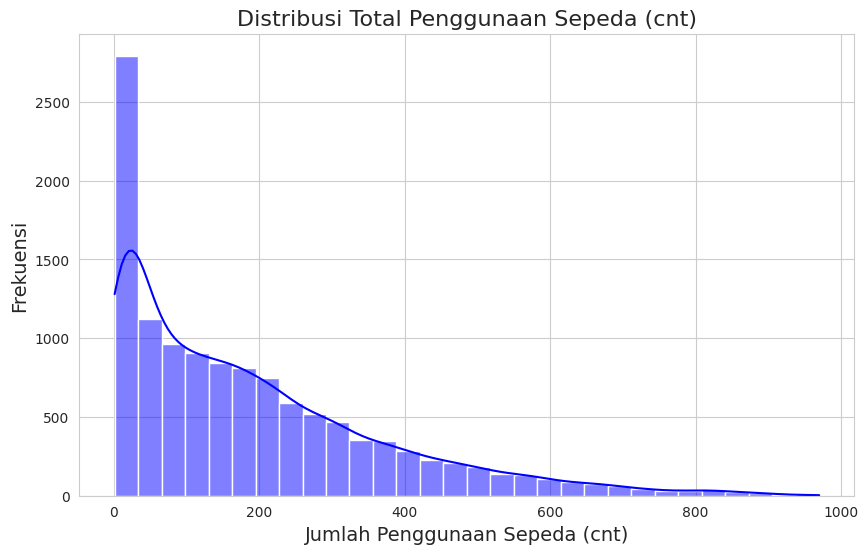

<ipython-input-14-1f9f700271de>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df, palette='Set2')


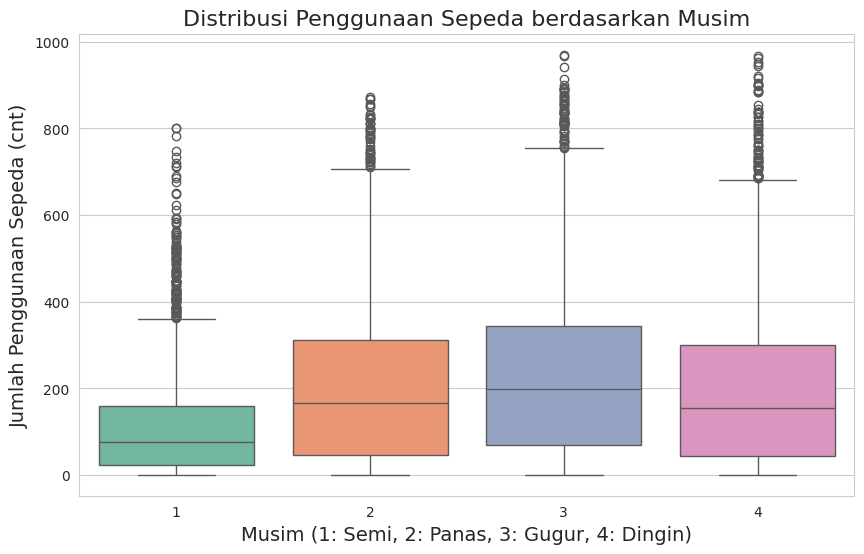

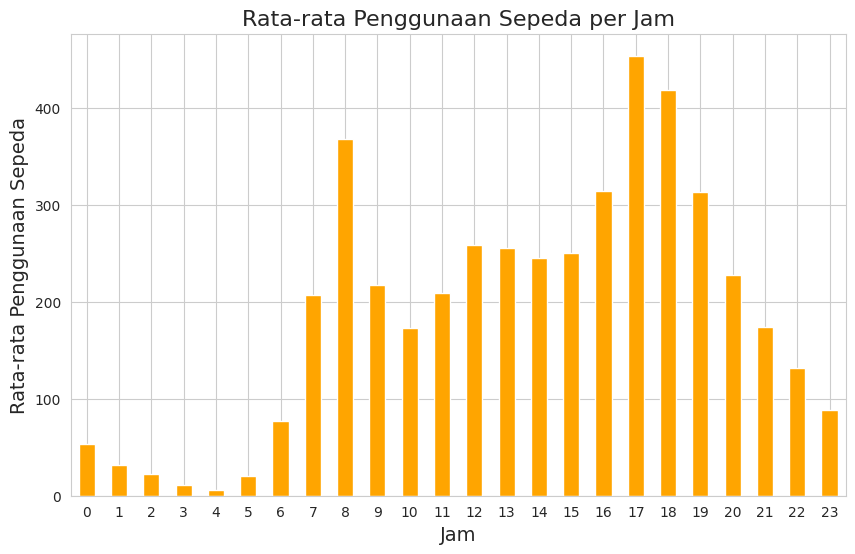

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style('whitegrid')

# Distribution of the target variable `cnt`
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Total Penggunaan Sepeda (cnt)', fontsize=16)
plt.xlabel('Jumlah Penggunaan Sepeda (cnt)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

# Boxplot of `cnt` by `season` to analyze seasonality effects
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='Set2')
plt.title('Distribusi Penggunaan Sepeda berdasarkan Musim', fontsize=16)
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)', fontsize=14)
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)', fontsize=14)
plt.show()

# Average hourly usage
hourly_usage = df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
hourly_usage.plot(kind='bar', color='orange')
plt.title('Rata-rata Penggunaan Sepeda per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Penggunaan Sepeda', fontsize=14)
plt.xticks(rotation=0)
plt.show()


Berikut adalah beberapa temuan dari visualisasi awal:

Distribusi Total Penggunaan Sepeda (cnt):

Distribusi menunjukkan jumlah pengguna bervariasi dari sangat rendah hingga mendekati 1.000, dengan sebagian besar berada di bawah 400.

Distribusi Penggunaan Sepeda berdasarkan Musim:

Penggunaan sepeda cenderung lebih tinggi selama musim panas (2) dan musim gugur (3), dibandingkan musim semi (1) atau musim dingin (4).

Rata-rata Penggunaan Sepeda per Jam:

Aktivitas tertinggi terjadi pada pagi hari (jam 8-9) dan sore hari (jam 17-18), mencerminkan pola penggunaan untuk perjalanan kerja (commuting).

##Analytics (Algorithm & Evaluation Metrics)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Cek akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7480


Pada hasil analisis, akurasi model memiliki nilai sebesar 0,748 yan berarti Random Forest berhasil memprediksi 74,8% dari target pada y_test dengan benar, disebabkan adanya kompleksitas model di mana model kurang optimal untuk menangkap pola dalam data tertentu, juga kerumitan model apabila model mampu mempelajari data latih terlalu baik tetapi tidak dapat melakukan generalisasi pada data uji.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Evaluasi menggunakan berbagai metrik
precision = precision_score(y_test, y_pred, average='weighted')  # Average='weighted' untuk multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Jika model adalah multi-class, gunakan ROC-AUC dengan multi_class='ovr' (one-vs-rest)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Print hasil metrik
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Menampilkan classification report untuk hasil lebih lengkap
print(classification_report(y_test, y_pred))


Precision: 0.7515
Recall: 0.7480
F1 Score: 0.7491
ROC AUC: 0.9008
              precision    recall  f1-score   support

      Rendah       0.87      0.83      0.85      1027
      Sedang       0.66      0.72      0.69       882
      Tinggi       0.68      0.64      0.65       524

    accuracy                           0.75      2433
   macro avg       0.73      0.73      0.73      2433
weighted avg       0.75      0.75      0.75      2433



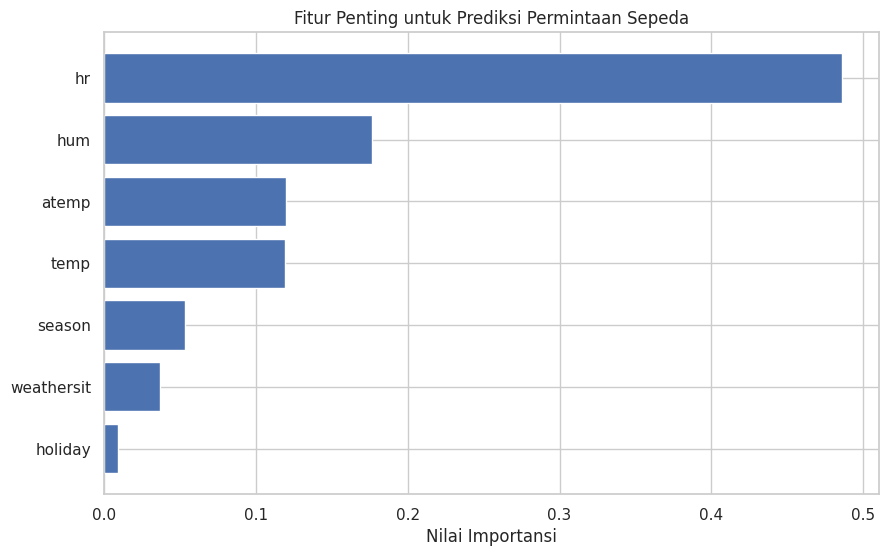

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan fitur penting dari model Random Forest
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot pentingnya fitur
plt.figure(figsize=(10, 6))
plt.title('Fitur Penting untuk Prediksi Permintaan Sepeda')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Nilai Importansi')
plt.show()


Interpretasi Nilai Penting Fitur
- Fitur hr: Merupakan fitur paling penting dalam model dengan nilai importansi tertinggi (sekitar 0.5). Artinya, waktu (jam) memiliki pengaruh paling besar dalam memprediksi permintaan sepeda.
- Fitur hum (humidity): Memiliki nilai penting kedua. Tingkat kelembapan udara mempengaruhi permintaan sepeda secara signifikan.
- Fitur atemp (feels-like temperature) dan temp (temperature): Kedua fitur ini juga penting, meskipun kontribusinya lebih kecil dibanding hr dan hum. Suhu nyata dan suhu yang dirasakan (perceived temperature) memengaruhi keputusan pengguna untuk menggunakan sepeda.
- Fitur season: Memberikan kontribusi yang sedang. Artinya, musim (seperti musim panas, dingin) juga memengaruhi permintaan.
- Fitur weathersit (situasi cuaca): Walaupun kurang signifikan dibandingkan fitur-fitur di atas, kondisi cuaca tetap memiliki dampak terhadap prediksi permintaan sepeda.
- Fitur holiday: Merupakan fitur dengan nilai importansi terkecil. Ini menunjukkan bahwa keberadaan hari libur memiliki dampak yang sangat kecil dalam model prediksi permintaan sepeda.

Berdasarkan analisis terhadap kedua output yang diberikan, berikut adalah kesimpulan yang dapat ditarik:

Kinerja Model Klasifikasi:

- Akurasi:
Model memiliki akurasi sebesar 75%, yang berarti 75% dari total prediksi sesuai dengan kelas aktual. Namun, akurasi saja tidak cukup untuk menilai kinerja model secara menyeluruh, terutama jika data tidak seimbang atau memiliki biaya kesalahan yang berbeda untuk setiap kelas.
- Precision, Recall, dan F1 Score: Nilai precision, recall, dan F1 score yang dihitung untuk setiap kelas menunjukkan bahwa model memiliki performa terbaik pada kelas "Rendah" dengan F1 score 0.85, diikuti oleh kelas "Sedang" (F1 score 0.69) dan "Tinggi" (F1 score 0.65). Hal ini menunjukkan bahwa model lebih efektif dalam mengidentifikasi kelas "Rendah" dibandingkan dengan kelas lainnya.
ROC AUC: Nilai ROC AUC sebesar 0.9008 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif.

Pentingnya Fitur dalam Model:

Model sangat dipengaruhi oleh fitur waktu (hr) dan kelembapan (hum), yang berarti kedua faktor ini adalah prediktor utama dalam memahami pola penggunaan sepeda.
Fitur seperti suhu (temp dan atemp) dan musim juga memiliki dampak, tetapi kurang dominan dibandingkan hr.
Fitur holiday memiliki pengaruh paling kecil, sehingga mungkin tidak terlalu relevan dalam konteks prediksi ini.

Rekomendasi:

- Peningkatan Model: Untuk meningkatkan kinerja model, terutama dalam mengidentifikasi kelas "Tinggi", disarankan untuk melakukan penyesuaian pada fitur-fitur yang memiliki kontribusi rendah atau mempertimbangkan penambahan fitur baru yang mungkin lebih relevan.
- Analisis Data: Melakukan analisis lebih lanjut terhadap distribusi data dan kemungkinan ketidakseimbangan kelas dapat membantu dalam memahami mengapa model kurang efektif pada kelas tertentu.
- Evaluasi Metrik Lain: Selain akurasi, penting untuk mempertimbangkan metrik lain seperti precision, recall, dan F1 score untuk mendapatkan gambaran yang lebih komprehensif tentang kinerja model.

Dengan demikian, meskipun model menunjukkan kinerja yang baik secara keseluruhan, terdapat area yang memerlukan perhatian lebih untuk meningkatkan akurasinya, terutama dalam mengidentifikasi kelas "Tinggi".